In [14]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
rcParams['figure.figsize']=10,6
import csv
import numpy as np

In [9]:
df2=pd.read_csv('final_input_file.csv')
#df2

# Visualizing The Dataset

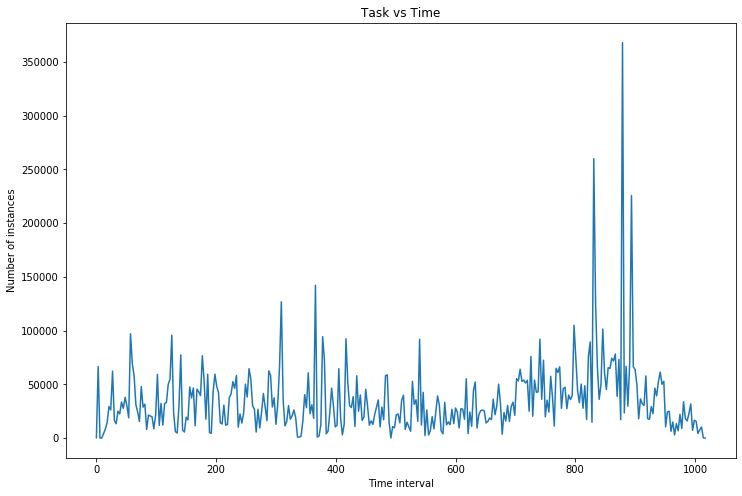

In [10]:
fig=plt.figure(figsize=(12,8))
plt.title("Task vs Time")
plt.xlabel("Time interval")
plt.ylabel("Number of instances")
plt.plot(df2.time_interval, df2.no_of_instances)
plt.show()

# Stationarity Check

In [11]:
#Referrence: "https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/"
#Perform Dickey-Fuller test to test data stationarity
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller test')
dftest=adfuller(df2.no_of_instances, autolag='AIC')
dfoutput=pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key]= value
print(dfoutput)

Results of Dickey-Fuller test
Test Statistic                  -4.600803
p-value                          0.000129
#Lags Used                       4.000000
Number of Observations Used    335.000000
Critical Value (1%)             -3.450022
Critical Value (5%)             -2.870207
Critical Value (10%)            -2.571387
dtype: float64


In Dickey-Fuller test the critical value should be more than the test statistics. p-value should be very small. Our result satisfies it. So our data is Stationary

# ARIMA Model

                             ARIMA Model Results                              
Dep. Variable:      D.no_of_instances   No. Observations:                  339
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -4051.026
Method:                       css-mle   S.D. of innovations          37441.832
Date:                Sat, 28 Nov 2020   AIC                           8108.052
Time:                        22:21:41   BIC                           8119.530
Sample:                             1   HQIC                          8112.626
                                                                              
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.8820   1347.008     -0.001      0.999   -2640.970    2639.206
ar.L1.D.no_of_instances    -0.5112      0.047    -10.941      0.000      -0.603      -0.420


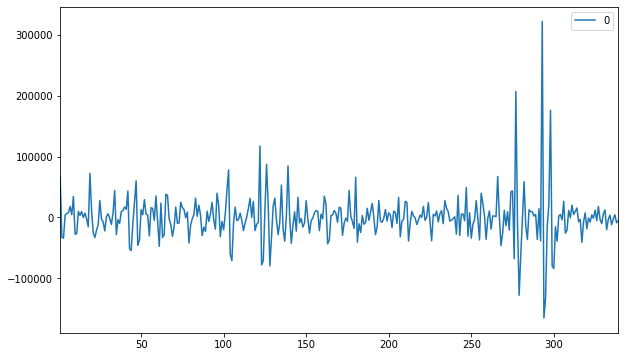

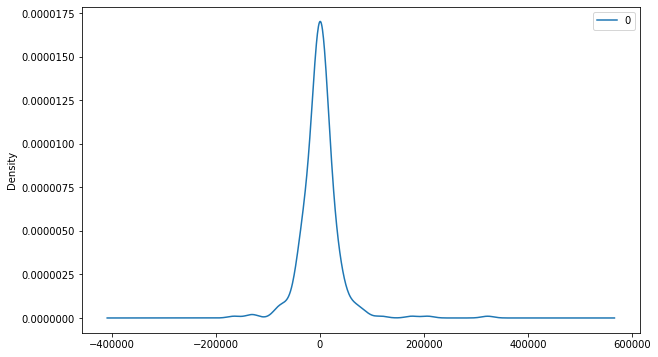

                   0
count     339.000000
mean        0.184165
std     37542.271050
min   -165140.409954
25%    -13256.379283
50%      -830.619428
75%     11456.339078
max    322078.908994


In [12]:
#Referrence: "https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/"
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
 
# fit model
model = ARIMA(df2.no_of_instances, order=(1,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

# Without Sliding Window ARIMA

C:\Users\Uvcan\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  # This is added back by InteractiveShellApp.init_path()


Size= 272
272
68
Time, predicted, expected 
 816 37410 48646.0
Time, predicted, expected 
 819 39739 17227.0
Time, predicted, expected 
 822 30723 75695.0
Time, predicted, expected 
 825 50560 89404.0
Time, predicted, expected 
 828 83820 14633.0
Time, predicted, expected 
 831 46646 259887.0
Time, predicted, expected 
 834 139648 125832.0
Time, predicted, expected 
 837 194117 66533.0
Time, predicted, expected 
 840 93588 35993.0
Time, predicted, expected 
 843 49608 49375.0
Time, predicted, expected 
 846 43658 101400.0
Time, predicted, expected 
 849 79025 60457.0
Time, predicted, expected 
 852 78720 45092.0
Time, predicted, expected 
 855 52019 65475.0
Time, predicted, expected 
 858 56665 64705.0
Time, predicted, expected 
 861 65364 74241.0
Time, predicted, expected 
 864 70450 71728.0
Time, predicted, expected 
 867 73180 78135.0
Time, predicted, expected 
 870 75726 38759.0
Time, predicted, expected 
 873 56158 73167.0
Time, predicted, expected 
 876 58403 17094.0
Time, predic

C:\Users\Uvcan\Anaconda3\lib\site-packages\ipykernel_launcher.py:59: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


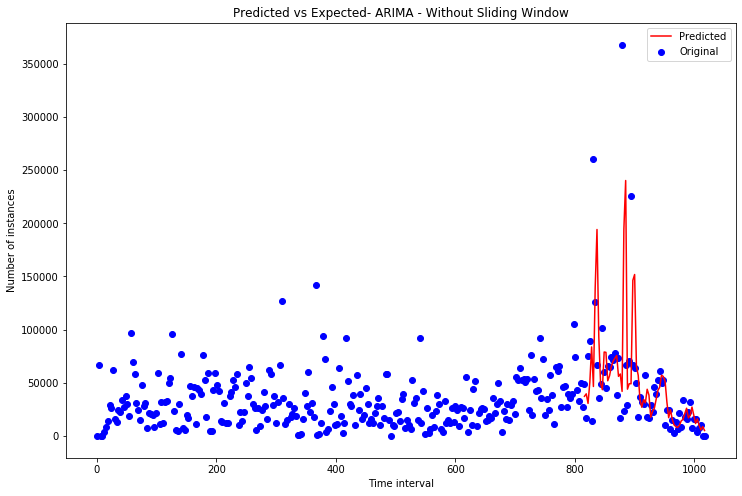

In [13]:
#Referrence: "https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/"
from pandas import read_csv
import numpy
import math
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA

#Computational Time
import time
time_start = time.clock()
 
X = df2.no_of_instances
X = X.astype('float32')
size = int(len(X) * 0.80)
print('Size=',size)
train, test = X[0:size], X[size:len(X)]
print(len(train))
print(len(test))
history = [x for x in train]
#print('History \n', history)
#print('Train \n', train)
#print('Test \n', test)
predictions = list()
#for t in range(len(test)):
times=[]
SE=0
sumAPE=0
sumMASE=0
for t in range (len(train),len(train)+len(test)):
    model = ARIMA(history, order=(1,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    #print('OUTPUT= \n', output)
    yhat = int(output[0])
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    #print('XYZ')
    times.append(df2.time_interval[t])
    print('Time, predicted, expected \n',df2.time_interval[t], yhat, obs)
    #Evaluation
    e=abs(yhat-obs)
    SE=SE+e*e
    APE=(abs(yhat-obs)/obs)
    sumAPE=sumAPE+APE
    #ASE=abs((yhat-obs)/(test[t]-df2.no_of_instances[t-1]))
    #sumMASE=sumMASE+ASE
RMSE=math.sqrt(SE/len(test))
MAPE=(sumAPE/(len(test)))*100
#MASE=(sumMASE/(len(test)))
print('RMSE Value= ', RMSE)
print('MAPE Value= ', MAPE)
#print('MASE Value= ', MASE)

#print('Time= \n', times)

#Computational Time
time_elapsed = (time.clock() - time_start)
print('Computational Time=', time_elapsed)

# plot
fig=plt.figure(figsize=(12,8))
plt.title("Predicted vs Expected- ARIMA - Without Sliding Window")
plt.xlabel("Time interval")
plt.ylabel("Number of instances")
plt.plot(times, predictions, color='red', label='Predicted')
plt.scatter(df2.time_interval, df2.no_of_instances, color='blue', label='Original', linestyle='solid')
plt.legend()
plt.show()
